In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train=pd.read_csv("train_X.csv")
Y_train=pd.read_csv("train_Y.csv")

X_test=pd.read_csv("test_X.csv")
Y_test=pd.read_csv("test_Y.csv")

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
#we need to temove first column as it is faltu
X_train=X_train.drop("Id",axis=1)
Y_train=Y_train.drop("Id",axis=1)


X_test=X_test.drop("Id",axis=1)
Y_test=Y_test.drop("Id",axis=1)


In [5]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [6]:
#reshapign the data for correct operations
X_train = X_train.T
Y_train = Y_train.values.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.values.reshape(1, X_test.shape[1])


In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7, 891)
(1, 891)
(7, 418)
(1, 418)


In [8]:
def sigmoidfunction(x):
    return 1/(1+np.exp(-x))

In [9]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoidfunction(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [73]:
iterations=10000
learningrate=0.0045
W,B,cost_list=model(X_train,Y_train,learningrate,iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  1000 iteration is :  0.5850189644398129
cost after  2000 iteration is :  0.5458680250369046
cost after  3000 iteration is :  0.5194040860413573
cost after  4000 iteration is :  0.5008966746080021
cost after  5000 iteration is :  0.48780534589629926
cost after  6000 iteration is :  0.47842226067898436
cost after  7000 iteration is :  0.47158611824667546
cost after  8000 iteration is :  0.4665125818799544
cost after  9000 iteration is :  0.46267399417609584


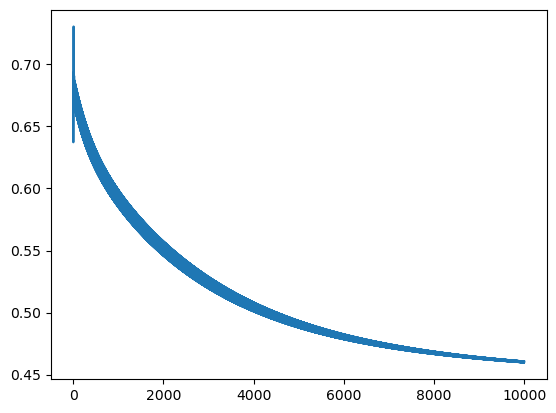

In [74]:
plt.plot(np.arange(iterations),cost_list)
plt.show()

In [75]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoidfunction(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [76]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  91.87 %
